# Dask Bag


- **Dask Bag**:
  - Designed specifically for large, unstructured or semi-structured data (e.g., lists of Python objects, JSON files, or text files).
  - High-level abstraction makes it simpler to work with large datasets.
  - Built-in methods like `map` and `filter` handle the partitioning, scheduling, and execution efficiently.

- **Dask Delayed**:
  - Requires you to explicitly wrap functions with `dask.delayed`.
  - More control, but also more boilerplate code for the same task.

**When to Use Each**

| Use Case                       | Dask Bag                                   | Dask Delayed                               |
|--------------------------------|--------------------------------------------|-------------------------------------------|
| **Unstructured or iterable data** | Best suited for operations on large collections (lists, text, JSON). | Less convenient, requires manual wrapping and partitioning. |
| **Custom workflows**           | Limited flexibility for defining complex workflows. | Perfect for highly customized workflows or chaining arbitrary computations. |
| **Performance**                | Optimized for embarrassingly parallel tasks. | Allows custom optimizations but requires manual effort. |
| **Ease of use**                | Higher-level API; less code.               | Low-level API; more control, but more verbose. |

- Use **Dask Bag** for high-level parallelism on collections.
- Use **Dask Delayed** for low-level, customized workflows.

For most standard map/filter/reduce tasks on collections, **Dask Bag is the better choice**, while **Dask Delayed** shines when you need flexibility for more complex computations.

In [1]:
from dask import delayed, compute, visualize

In [2]:
%%time

# Define a delayed function for squaring
@delayed
def square(x):
    return x**2

# Create a delayed computation for each number
numbers = range(1, 11)
print(*numbers)
squares = [square(x) for x in numbers]

#print(squares.compute()) this gives an error!
print(compute(*squares))

1 2 3 4 5 6 7 8 9 10
(1, 4, 9, 16, 25, 36, 49, 64, 81, 100)
CPU times: user 134 ms, sys: 25.4 ms, total: 159 ms
Wall time: 212 ms


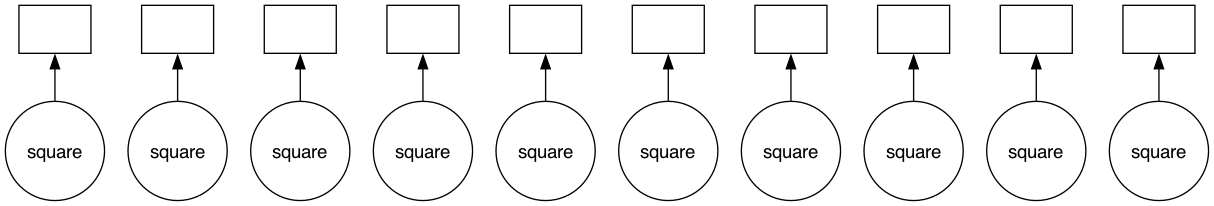

In [3]:
# Visualize the computation graph
visualize(squares)


In [4]:
%%time 
import dask.bag as db

# Create a Bag from a list of numbers
numbers = db.from_sequence(range(1, 11), npartitions=10)
print(numbers)

# Square each number with map and lambda
squares = numbers.map(lambda x: x**2)

# Compute the results
print(squares.compute())


dask.bag<from_sequence, npartitions=10>
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
CPU times: user 14.8 ms, sys: 15.5 ms, total: 30.2 ms
Wall time: 178 ms


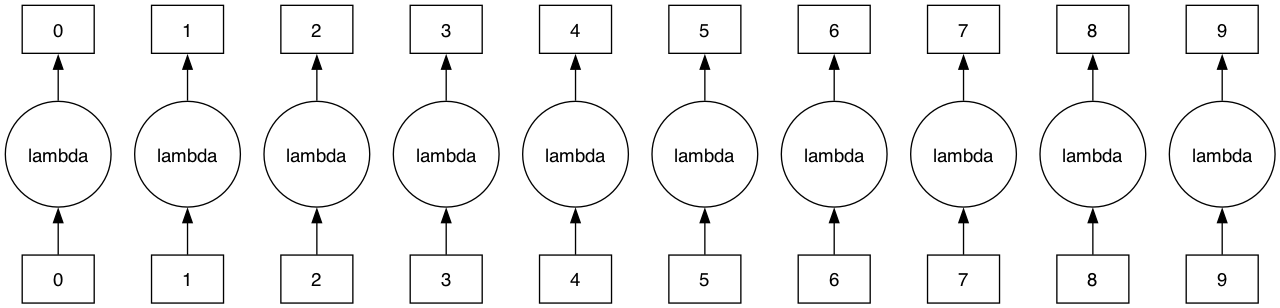

In [5]:
squares.visualize()